In [ ]:
import h5py

In [ ]:
import h5py
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing

#%%
data = []
labels = []

with h5py.File('/content/drive/MyDrive/dataset2_final.hdf5', 'r') as hf:
    X = hf.get('X')
    data = np.array(X)
    Y = hf.get('Y')
    labels = np.array(Y)
hf.close()

with h5py.File('/content/drive/MyDrive/dataset1_final.hdf5', 'r') as hf:
    X = hf.get('X')
    data2 = np.array(X)
    Y = hf.get('Y')
    labels2 = np.array(Y)
hf.close()


In [ ]:
data2.shape

(82, 250, 192)

In [ ]:
labels2.shape

(82, 1)

In [ ]:
labels=(labels/2).astype(np.int)

In [ ]:
data2 = data2[labels2[:,0]==0,:,:]
labels2 = labels2[labels2[:,0]==0]

In [ ]:
data = np.append(data,data2,axis=0)

In [ ]:
labels = np.append(labels,labels2,axis=0)

In [ ]:
import tensorflow
tf = tensorflow

In [ ]:
np.random.shuffle(day)

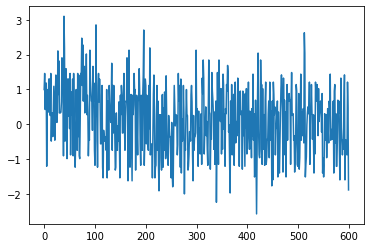

In [ ]:
plot = data2.reshape(-1,192)
plt.plot(plot[:600,6])

In [ ]:
data[0,:,6]

array([-0.15068422, -0.7375391 ,  0.03677094, -0.00973959,  1.7184919 ,
        0.46762145,  0.46762145, -0.17438628,  1.3991885 , -0.36625347,
       -0.00973959,  0.46762145, -0.7375391 ,  0.643468  ,  0.46762145,
       -0.7375391 , -0.4637438 ,  0.40085998, -0.15068422, -0.00973959,
        0.5778913 ,  0.17493795, -0.15068422,  0.643468  , -0.9942391 ,
       -0.07994401, -1.4222623 , -0.4637438 , -0.36625347, -1.394835  ,
       -1.3675019 , -0.36625347, -0.9422707 , -0.53756976,  0.17493795,
        0.10610755,  1.0909642 , -0.4637438 , -1.0728041 ,  0.10610755,
        0.46762145, -0.36625347, -1.0728041 , -0.15068422, -0.7375391 ,
        0.75181544, -0.15068422,  0.7086171 , -0.10346372, -0.53756976,
        0.7086171 , -0.6620102 , -1.394835  ,  0.10610755, -0.762863  ,
       -0.36625347,  0.10610755, -0.17438628, -0.4637438 , -0.762863  ,
        0.46762145, -1.2860597 , -0.4882841 , -0.36625347, -0.07994401,
       -0.6620102 , -0.15068422, -0.7375391 , -0.10346372,  0.10

In [ ]:
np.random.shuffle(data)
np.random.shuffle(labels)

In [ ]:
n_comps = 5
pca = PCA(n_components=n_comps)
new_data = np.empty(shape=(data.shape[0], data.shape[1], n_comps))
for i in range(data.shape[0]):
    pcs = pca.fit_transform(data[i])
    new_data[i] = pcs

In [ ]:
new_data.shape

(85, 250, 5)

In [ ]:
import pywt
data_dwt = np.zeros((new_data.shape[0],250,250))
signal_length = 250
scales = np.arange(1, signal_length+1)
for i in range(data.shape[0]):
  coeff, freq = pywt.cwt(new_data[i,:,1], scales, 'morl')
  data_dwt[i] = coeff

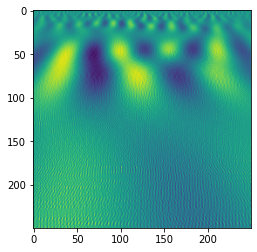

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data_dwt[0])

In [ ]:
labels[2]

array([0])

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Model configuration

# Disable eager execution
tf.compat.v1.disable_eager_execution()
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(250, 250, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(data_dwt.reshape(*data_dwt.shape,1),labels, batch_size=1, epochs=100, validation_split=0.15)

Train on 72 samples, validate on 13 samples
Epoch 1/100
71/72 [============================>.] - ETA: 0s - loss: 120.4445 - accuracy: 0.4507

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


72/72 [==============================] - 3s 37ms/sample - loss: 119.3589 - accuracy: 0.4444 - val_loss: 18.9063 - val_accuracy: 0.4615
Epoch 2/100
72/72 [==============================] - 2s 35ms/sample - loss: 14.9650 - accuracy: 0.6528 - val_loss: 43.8054 - val_accuracy: 0.4615
Epoch 3/100
72/72 [==============================] - 3s 36ms/sample - loss: 6.3462 - accuracy: 0.8194 - val_loss: 25.3220 - val_accuracy: 0.3846
Epoch 4/100
72/72 [==============================] - 3s 35ms/sample - loss: 11.6704 - accuracy: 0.7778 - val_loss: 62.8362 - val_accuracy: 0.4615
Epoch 5/100
72/72 [==============================] - 3s 35ms/sample - loss: 17.2384 - accuracy: 0.7500 - val_loss: 47.0660 - val_accuracy: 0.4615
Epoch 6/100
72/72 [==============================] - 3s 35ms/sample - loss: 2.2574 - accuracy: 0.9028 - val_loss: 36.7899 - val_accuracy: 0.4615
Epoch 7/100
72/72 [==============================] - 3s 35ms/sample - loss: 3.6809 - accuracy: 0.8611 - val_loss: 23.9866 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Define the Keras model
model = Sequential()
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(data,labels, batch_size=4, epochs=100, validation_split=0.15)


Train on 72 samples, validate on 13 samples
Epoch 1/100
72/72 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.6389

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


72/72 [==============================] - 2s 28ms/sample - loss: 0.6715 - accuracy: 0.6389 - val_loss: 0.6459 - val_accuracy: 0.7692
Epoch 2/100
72/72 [==============================] - 1s 18ms/sample - loss: 0.5029 - accuracy: 0.8333 - val_loss: 0.6092 - val_accuracy: 0.8462
Epoch 3/100
72/72 [==============================] - 1s 18ms/sample - loss: 0.4113 - accuracy: 0.8750 - val_loss: 0.5776 - val_accuracy: 0.8462
Epoch 4/100
72/72 [==============================] - 1s 18ms/sample - loss: 0.3362 - accuracy: 0.9444 - val_loss: 0.5806 - val_accuracy: 0.8462
Epoch 5/100
72/72 [==============================] - 1s 18ms/sample - loss: 0.2896 - accuracy: 0.9722 - val_loss: 0.5283 - val_accuracy: 0.8462
Epoch 6/100
72/72 [==============================] - 1s 18ms/sample - loss: 0.2279 - accuracy: 1.0000 - val_loss: 0.4889 - val_accuracy: 0.8462
Epoch 7/100
72/72 [==============================] - 1s 18ms/sample - loss: 0.1707 - accuracy: 1.0000 - val_loss: 0.4961 - val_accuracy: 0.8462
Epoc

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, LSTM,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(data,labels, batch_size=1, epochs=100, validation_split=0.2)

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


Epoch 1/100
68/68 [==============================] - 6s 65ms/step - loss: 0.6821 - accuracy: 0.6324 - val_loss: 1.0699 - val_accuracy: 0.1765
Epoch 2/100
68/68 [==============================] - 4s 58ms/step - loss: 0.6631 - accuracy: 0.6471 - val_loss: 1.3612 - val_accuracy: 0.1765
Epoch 3/100
68/68 [==============================] - 4s 58ms/step - loss: 0.6565 - accuracy: 0.6471 - val_loss: 1.7057 - val_accuracy: 0.1765
Epoch 4/100
68/68 [==============================] - 4s 58ms/step - loss: 0.6542 - accuracy: 0.6471 - val_loss: 2.1188 - val_accuracy: 0.1765
Epoch 5/100
68/68 [==============================] - 4s 58ms/step - loss: 0.6538 - accuracy: 0.6471 - val_loss: 2.6930 - val_accuracy: 0.2941
Epoch 6/100
29/68 [===========>..................] - ETA: 2s - loss: 0.6515 - accuracy: 0.6552

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Define the Keras model
model = Sequential()
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(data[:,:,1:],labels, batch_size=1, epochs=100, validation_split=0.2)

Train on 65 samples, validate on 17 samples
Epoch 1/100
65/65 [==============================] - ETA: 0s - loss: 0.6214 - accuracy: 0.6923

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


65/65 [==============================] - 5s 77ms/sample - loss: 0.6214 - accuracy: 0.6923 - val_loss: 0.6809 - val_accuracy: 0.4118
Epoch 2/100
65/65 [==============================] - 5s 71ms/sample - loss: 0.4393 - accuracy: 0.8154 - val_loss: 0.6280 - val_accuracy: 0.7059
Epoch 3/100
65/65 [==============================] - 5s 72ms/sample - loss: 0.2213 - accuracy: 0.9385 - val_loss: 0.2042 - val_accuracy: 1.0000
Epoch 4/100
65/65 [==============================] - 5s 73ms/sample - loss: 0.0967 - accuracy: 0.9846 - val_loss: 0.1576 - val_accuracy: 1.0000
Epoch 5/100
65/65 [==============================] - 5s 71ms/sample - loss: 0.0572 - accuracy: 1.0000 - val_loss: 0.1256 - val_accuracy: 1.0000
Epoch 6/100
65/65 [==============================] - 5s 75ms/sample - loss: 0.1229 - accuracy: 0.9846 - val_loss: 0.0935 - val_accuracy: 1.0000
Epoch 7/100
65/65 [==============================] - 5s 74ms/sample - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 1.0000
Epoc

KeyboardInterrupt: ignored

In [ ]:
X = data[:,:,:64]

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Define the Keras model
model = Sequential()
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X,labels, batch_size=1, epochs=100, validation_split=0.2)


Train on 65 samples, validate on 17 samples
Epoch 1/100
65/65 [==============================] - ETA: 0s - loss: 0.5624 - accuracy: 0.7385

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


65/65 [==============================] - 5s 70ms/sample - loss: 0.5624 - accuracy: 0.7385 - val_loss: 0.6519 - val_accuracy: 0.5294
Epoch 2/100
65/65 [==============================] - 5s 73ms/sample - loss: 0.2651 - accuracy: 0.9231 - val_loss: 0.3491 - val_accuracy: 0.9412
Epoch 3/100
65/65 [==============================] - 5s 72ms/sample - loss: 0.1150 - accuracy: 0.9846 - val_loss: 0.2481 - val_accuracy: 0.9412
Epoch 4/100
65/65 [==============================] - 5s 70ms/sample - loss: 0.0555 - accuracy: 1.0000 - val_loss: 0.1229 - val_accuracy: 1.0000
Epoch 5/100
65/65 [==============================] - 5s 71ms/sample - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.0735 - val_accuracy: 1.0000
Epoch 6/100
65/65 [==============================] - 5s 73ms/sample - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 7/100
65/65 [==============================] - 5s 72ms/sample - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 1.0000
Epoc

KeyboardInterrupt: ignored

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train[:,:,7], y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.20, random_state=42)

In [ ]:
y_pred = clf.predict(X_test[:,:,7])

In [ ]:
np.mean(y_pred==y_test)

0.5121107266435986

In [ ]:
pca = PCA(n_components=5)
pcs = pca.fit_transform(data)
print(data.shape)

ValueError: ignored

In [ ]:
X_train.shape

(65, 250, 192)

In [ ]:
def solve(l):
    c2, c3, c5, c7=0,0,0,0;
    while(l > 0):
    
        temp = l % 10
        if(temp == 2):
            c2 +=1
        
        elif (temp == 3):
            c3 +=1
        
        elif (temp == 5):
            c5 +=1
        
        elif (temp == 7):
            c7 +=1
        
        l = l/10;
    
    if (c2 >= c3 and c3 >= c5 and c5 >= c7):
    
        return True
    
    else:
    
        return False
    

def calpr(l,r):
    pr = 0
    for i in range(l,r+1):
    
        res = solve(i)
        if(res == True):
        
            pr +=1;
        
    
    print(pr);



n = int(input())
for i in range(n):
  temp = input().split()
  l = int(temp[0])
  r = int(temp[1])
  calpr(l, r)


 


1
4 5
1


In [ ]:
import re
re.findall(r'lol', 'abcdefghijklolol')

['lol']

In [ ]:
def trans(n):
  return lambda x:x+n

f = trans(9)
f(4)

13

In [ ]:
no = [9,5,4,13,14,26,11]
print(list(filter(lambda i:i%2, no)))

[9, 5, 13, 11]


In [ ]:
import threading
lock = threading.RLock()
print(lock.acquire(), lock.acquire(0))

True True


In [ ]:
lock.acquire(0)

True

In [ ]:
from urllib.request import urlopen
import re
reader = re.compile('<DT><a href = "[^"]+>(.+?)</a>')
url = 'https://www.google.com'
sock = urlopen(url).read().decode("utf-8")
li = reader.findall(sock)
li

[]

In [ ]:
!pip install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib
